# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.146808


In [3]:
# 1.Criando a matriz:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [4]:
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Wed, 01 Oct 2025   Prob (F-statistic):           2.64e-20
Time:                        12:58:58   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# 2.Retirando as variaveis que se mostraram desnecessarias:
y, X = patsy.dmatrices('tip ~ net_bill', tips)
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 01 Oct 2025   Prob (F-statistic):           5.02e-23
Time:                        12:58:58   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

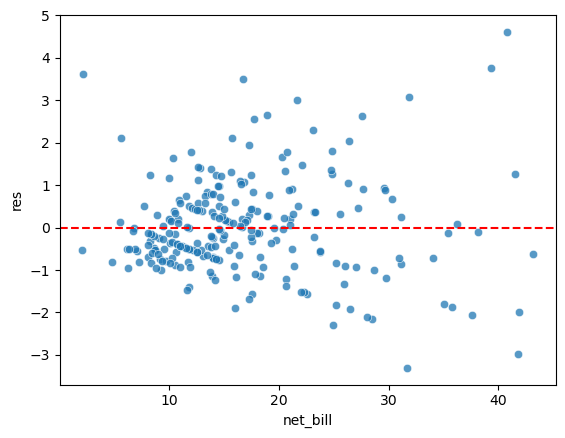

In [6]:
# 3.Gráfico de residuos em função de net_bill:
tips['res'] = modelo.resid
sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Wed, 01 Oct 2025   Prob (F-statistic):           4.40e-20
Time:                        12:58:58   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430  

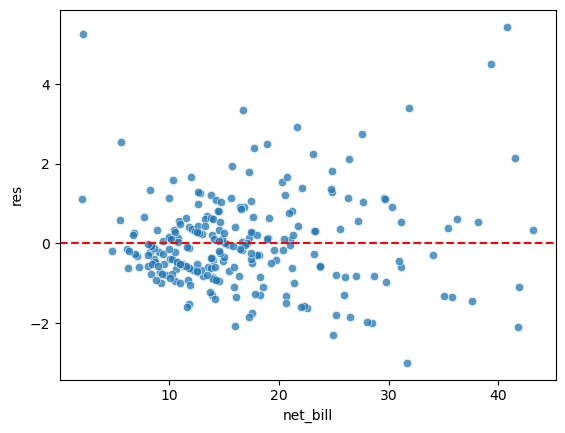

In [7]:
# 4.Transformando net_bill no log:
reg = smf.ols('tip ~ np.log(net_bill)', data=tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Wed, 01 Oct 2025   Prob (F-statistic):           4.96e-22
Time:                        12:58:59   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.07

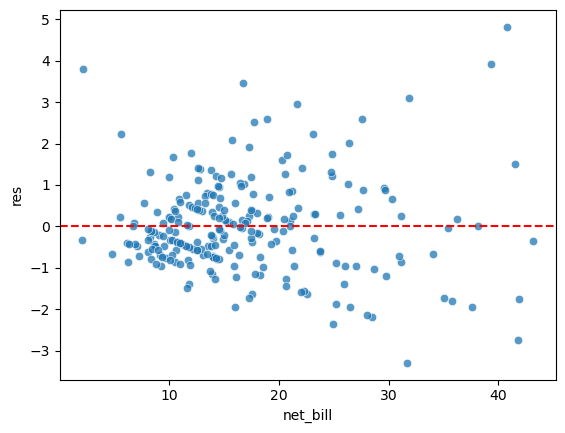

In [8]:
# E em polinômio:
reg = smf.ols('tip ~ net_bill + np.power(net_bill,2)', data=tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

#### Escolha do melhor modelo:
* O primeiro modelo usado, sem alterar o X, é o modelo que melhor atende a essa base, dentre todos estes, ele possui o R² semelhante ao ultimo, com: 0.333, mas seu grafico de residuos é o mais disperto e o que apresenta maior idependencia

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [9]:
# 1.Criando a matriz:
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Wed, 01 Oct 2025   Prob (F-statistic):           1.21e-18
Time:                        12:58:59   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# 2.Retirando as variaveis que se mostraram desnecessarias:
y, X = patsy.dmatrices('np.log(tip) ~ net_bill', tips)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Wed, 01 Oct 2025   Prob (F-statistic):           2.60e-21
Time:                        12:58:59   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Wed, 01 Oct 2025   Prob (F-statistic):           2.60e-21
Time:                        12:58:59   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.0

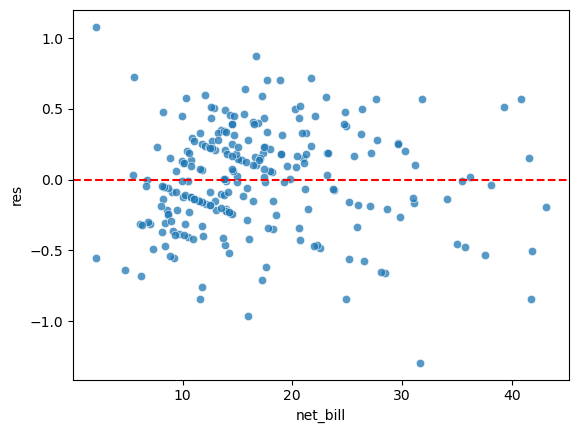

In [11]:
# 3.Gráfico de residuos em função de net_bill:
reg = smf.ols('np.log(tip) ~ net_bill', data=tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 01 Oct 2025   Prob (F-statistic):           5.62e-22
Time:                        12:58:59   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

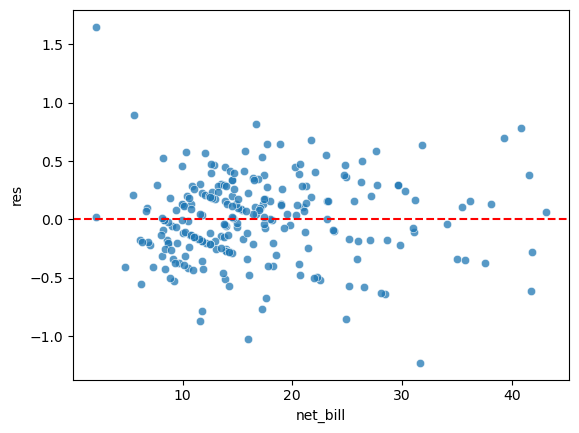

In [12]:
# 4.Transformando net_bill no log:
reg = smf.ols('np.log(tip) ~ np.log(net_bill)', data=tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Wed, 01 Oct 2025   Prob (F-statistic):           2.82e-22
Time:                        12:58:59   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.18

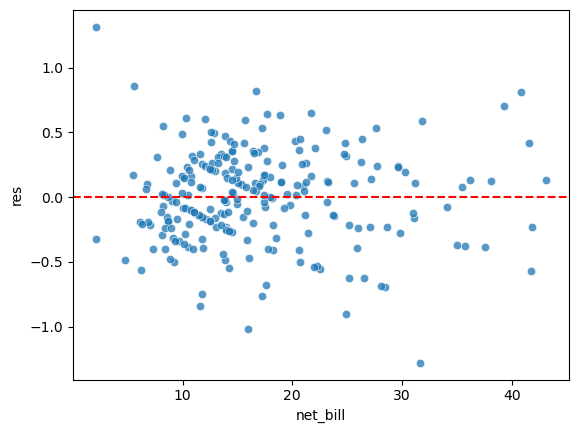

In [13]:
# E em polinômio:
reg = smf.ols('np.log(tip) ~ net_bill + np.power(net_bill,2)', data=tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

#### Escolha do melhor modelo:
* O Modelo usando polinômio é o modelo que melhor atende nesse caos, dentre todos estes, com o maior R² entre eles, de: 0.338, seu grafico de residuos não parece tão disperso quanto o do primeiro modelo, que usa apenas o 'log(tip)' e o net_bill normal, mas ainda sim está consideravelmente disperto, como os outros graficos ainda é possivel ver um padrão no X em torno de 10, mas é o que melhor explica o que queremos neste caso.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [14]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [15]:
reg = smf.ols('renda ~ tempo_emprego', data=df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Wed, 01 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:58:59   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409

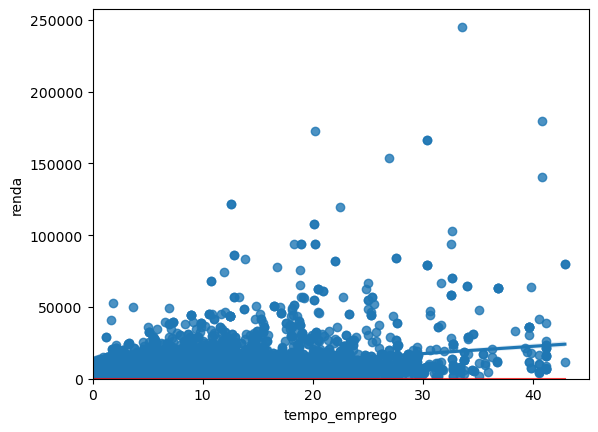

In [16]:
sns.regplot(y = 'renda', x = 'tempo_emprego', data = df)

x = np.linspace(0,df['tempo_emprego'].max(),100)
y = .1*x

plt.plot(x, y, '-r', label='linha dos 10%', alpha = .75)

plt.xlim(left = 0)
plt.ylim(bottom = 0)
plt.show()

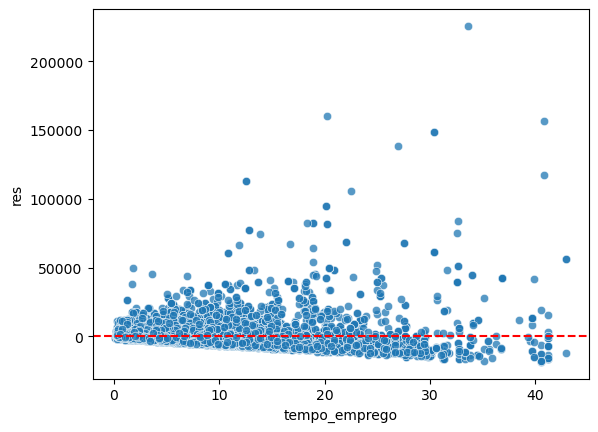

In [17]:
df['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [18]:
print(df.columns)

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda', 'res'],
      dtype='object')


In [19]:
# Renomeando as colunas
df = df.rename(columns={
    "posse_de_veiculo": "posseVeiculo",
    "posse_de_imovel": "posseImovel",
    "qtd_filhos": "qtdFilhos",
    "tipo_renda": "tipoRenda",
    "educacao": "educacao",
    "estado_civil": "estadoCivil",
    "tipo_residencia": "tipoResidencia",
    "tempo_emprego": "tempoEmprego",
    "qt_pessoas_residencia": "qtdPessoasResidencia"
})

# Fórmula usando os novos nomes
formula = """renda ~ tempoEmprego + C(sexo) + C(posseVeiculo) + C(posseImovel) 
             + qtdFilhos + C(tipoRenda) + C(educacao) + C(estadoCivil) 
             + C(tipoResidencia) + idade + qtdPessoasResidencia"""

y, X = patsy.dmatrices(formula, df)
modelo = sm.OLS(y, X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Wed, 01 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:59:00   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                          -5626.6247   2500.235     -2.250      0.024   -1.05e+04    -725.776
C(sexo)[T.M]                        6052.8592    155.859     38.836      0.000    5747.352    6358.367
C(posseVeiculo)[T.True]               48.9098    150.374      0.325      0.745    -245.846     343.666
C(posseImovel)[T.True]               366.5747    148.723      2.465      0.014      75.054     658.095
C(tipoRenda)[T.Bolsista]           -1357.7175   2564.833     -0.529      0.597   -6385.188    3669.753
C(tipoRenda)[T.Empresário]           823.1460    158.826      5.183      0.000     511.822    1134.470
C(tipoRenda)[T.Pensionista]        -2682.6331   2565.489     -1.046      0.296   -7711.391    2346.125
C(tipoRenda)[T.Servidor público]     137.0942    236.327      0.580      0.562    -326.143     600.332
C(educacao)[T.Pós graduação]        1090.5064   1690.396      0.645      0.519   -2222.932    4403.945
C(educacao)[T.Secundário]            607.3280    765.686      0.793      0.428    -893.536    2108.192
C(educacao)[T.Superior completo]    1225.5587    768.564      1.595      0.111    -280.947    2732.064
C(educacao)[T.Superior incompleto]   220.4722    827.097      0.267      0.790   -1400.767    1841.712
C(estadoCivil)[T.Separado]          1161.1096   1182.969      0.982      0.326   -1157.693    3479.912
C(estadoCivil)[T.Solteiro]           819.9016   1158.206      0.708      0.479   -1450.362    3090.165
C(estadoCivil)[T.União]             -475.3334    267.717     -1.776      0.076   -1000.101      49.434
C(estadoCivil)[T.Viúvo]             1053.5626   1229.396      0.857      0.391   -1356.245    3463.370
C(tipoResidencia)[T.Casa]           -298.3088    575.821     -0.518      0.604   -1427.008     830.390
C(tipoResidencia)[T.Com os pais]    -388.7990    641.844     -0.606      0.545   -1646.914     869.316
C(tipoResidencia)[T.Comunitário]    -459.8284   1120.521     -0.410      0.682   -2656.224    1736.567
C(tipoResidencia)[T.Estúdio]          77.2381   1056.186      0.073      0.942   -1993.051    2147.527
C(tipoResidencia)[T.Governamental]    73.8042    701.702      0.105      0.916   -1301.641    1449.249
tempoEmprego                         554.7551     11.044     50.230      0.000     533.107     576.404
qtdFilhos                          -1126.6107   1147.916     -0.981      0.326   -3376.703    1123.482
idade                                 42.0025      8.517      4.931      0.000      25.307      58.698
qtdPessoasResidencia                1269.8493   1145.868      1.108      0.268    -976.229    3515.928
==============================================================================
Omnibus:                    17568.773   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   J

In [20]:
y, X = patsy.dmatrices('renda ~ tempoEmprego + C(sexo) + C(posseImovel) + idade', df)

modelo = sm.OLS(y, X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     1047.
Date:                Wed, 01 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:59:01   Log-Likelihood:            -1.2882e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12422   BIC:                         2.577e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -2121.6370    329.140     -6.446      0.000   -2766.803   -1476.471
C(sexo)[T.M]            6045.7894    145.591     41.526      0.000    5760.409    6331.169
C(posseImovel)[T.True]   394.7377    145.657      2.710      0.007     109.228     680.247
tempoEmprego             550.4590     10.903     50.485      0.000     529.087     571.831
idade                     37.5533      7.838      4.791      0.000      22.189      52.918
==============================================================================
Omnibus:                    17506.453   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9670624.952
Skew:                           8.073   Prob(JB):                         0.00
Kurtosis:                     138.705   Cond. No.                         206.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

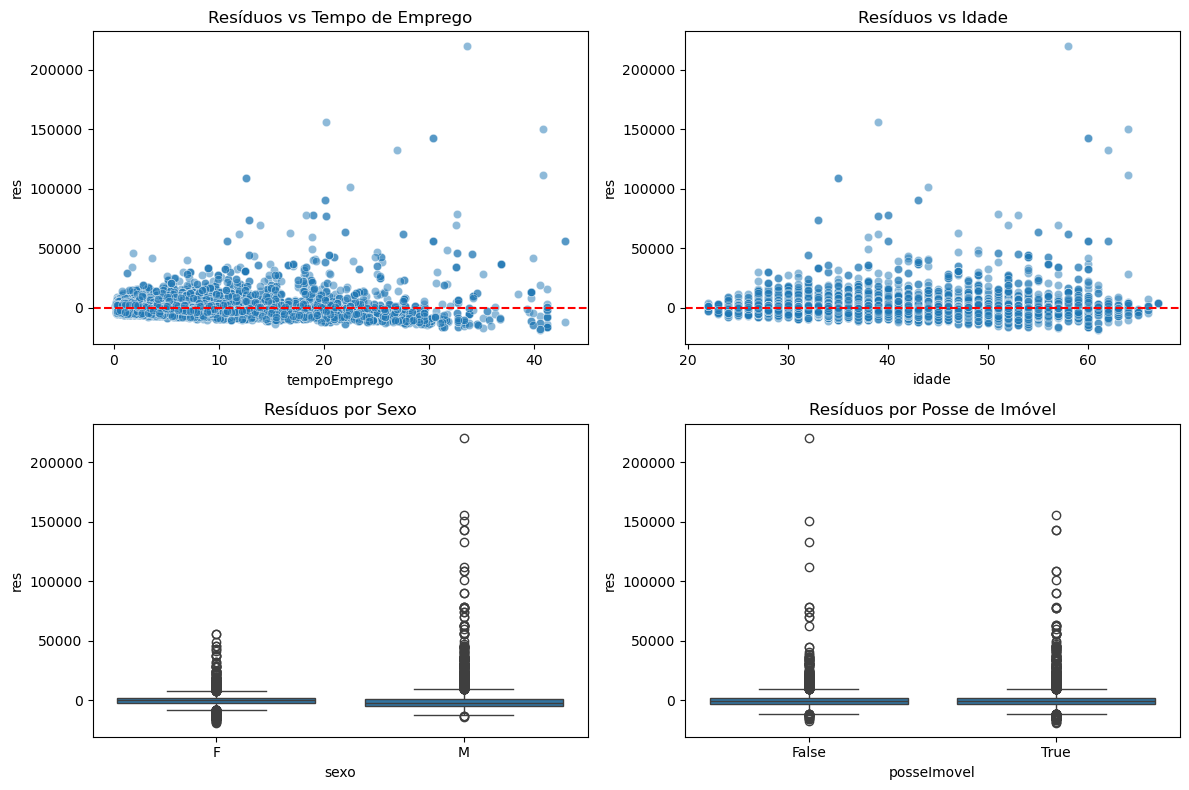

In [21]:
# Criando um DataFrame apenas com as linhas usadas no modelo
df_modelo = df.dropna(subset=['renda','tempoEmprego','sexo','posseImovel','idade']).copy()
df_modelo['res'] = modelo.resid  # adicionando resíduos

# Gráficos de resíduos
fig, axes = plt.subplots(2,2, figsize=(12,8))

# Resíduos vs Tempo de Emprego
sns.scatterplot(x="tempoEmprego", y="res", data=df_modelo, alpha=.5, ax=axes[0,0])
axes[0,0].axhline(0, color="r", linestyle="--")
axes[0,0].set_title("Resíduos vs Tempo de Emprego")

# Resíduos vs Idade
sns.scatterplot(x="idade", y="res", data=df_modelo, alpha=.5, ax=axes[0,1])
axes[0,1].axhline(0, color="r", linestyle="--")
axes[0,1].set_title("Resíduos vs Idade")

# Resíduos por Sexo
sns.boxplot(x="sexo", y="res", data=df_modelo, ax=axes[1,0])
axes[1,0].set_title("Resíduos por Sexo")

# Resíduos por Posse de Imóvel
sns.boxplot(x="posseImovel", y="res", data=df_modelo, ax=axes[1,1])
axes[1,1].set_title("Resíduos por Posse de Imóvel")

plt.tight_layout()
plt.show()

In [22]:
y, X = patsy.dmatrices('np.log(renda) ~ tempoEmprego + C(sexo) + C(posseImovel) + idade', df)

modelo = sm.OLS(y, X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     1637.
Date:                Wed, 01 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:59:01   Log-Likelihood:                -13685.
No. Observations:               12427   AIC:                         2.738e+04
Df Residuals:                   12422   BIC:                         2.742e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7.2790      0.031    233.591      0.000       7.218       7.340
C(sexo)[T.M]               0.7895      0.014     57.276      0.000       0.762       0.817
C(posseImovel)[T.True]     0.0898      0.014      6.512      0.000       0.063       0.117
tempoEmprego               0.0610      0.001     59.110      0.000       0.059       0.063
idade                      0.0042      0.001      5.635      0.000       0.003       0.006
==============================================================================
Omnibus:                        1.194   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.551   Jarque-Bera (JB):                1.174
Skew:                           0.023   Prob(JB):                        0.556
Kurtosis:                       3.012   Cond. No.                         206.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

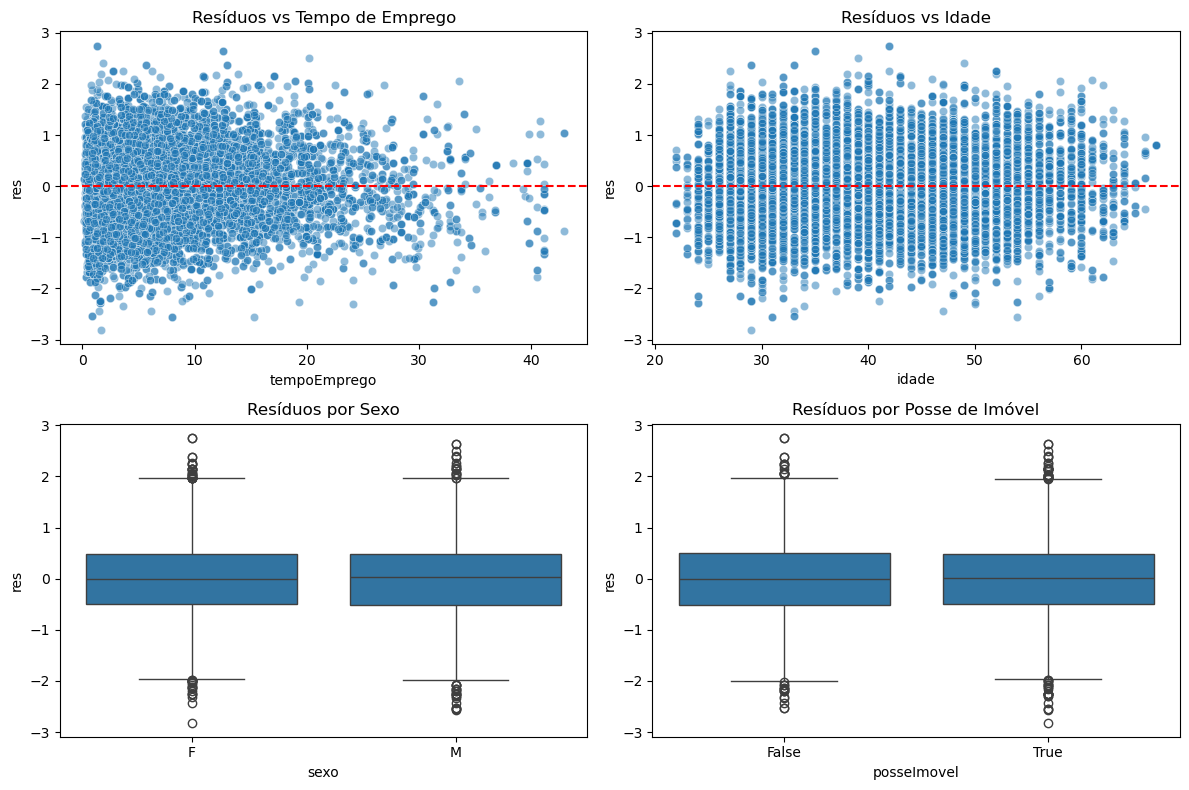

In [23]:
df_modelo = df.dropna(subset=['renda','tempoEmprego','sexo','posseImovel','idade']).copy()
df_modelo['res'] = modelo.resid

fig, axes = plt.subplots(2,2, figsize=(12,8))

sns.scatterplot(x="tempoEmprego", y="res", data=df_modelo, alpha=.5, ax=axes[0,0])
axes[0,0].axhline(0, color="r", linestyle="--")
axes[0,0].set_title("Resíduos vs Tempo de Emprego")

sns.scatterplot(x="idade", y="res", data=df_modelo, alpha=.5, ax=axes[0,1])
axes[0,1].axhline(0, color="r", linestyle="--")
axes[0,1].set_title("Resíduos vs Idade")

sns.boxplot(x="sexo", y="res", data=df_modelo, ax=axes[1,0])
axes[1,0].set_title("Resíduos por Sexo")

sns.boxplot(x="posseImovel", y="res", data=df_modelo, ax=axes[1,1])
axes[1,1].set_title("Resíduos por Posse de Imóvel")

plt.tight_layout()
plt.show()